## Machine Learning from Scratch

One of the very simple projects that we can use to start learning the machine learning is predicting car Co2 Emission according to features such as fuel consumption, engine size and number of cylinders. In this notebook, we start by using the simple linear regression machine learning model, which is a supervised model.In this model, predictions are made based on a single feature of the data.



### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline




### Reading the dataset

In [2]:
df = pd.read_csv('E:\Data Sciense\DataSet\FuelConsumption.csv')

df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212



### Data Exploration

#### Lets first have a descriptive exploration on our data

In [3]:

df.describe()  # summarize the data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000



#### Lets select somefeatures to explore more

In [4]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244



#### Lets plot each of these features

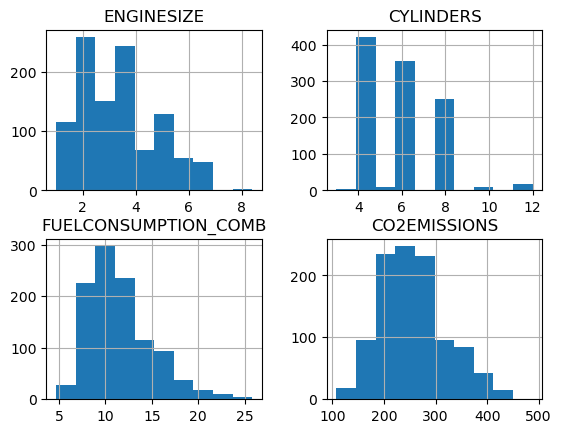

In [5]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()



#### Now, lets plot each of these features vs the Emission, to see how linear is their relation.

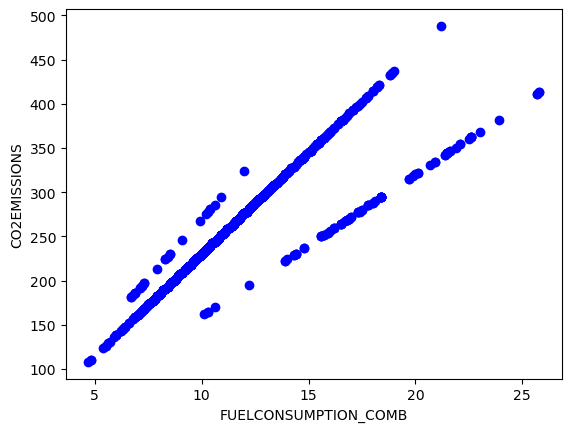

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

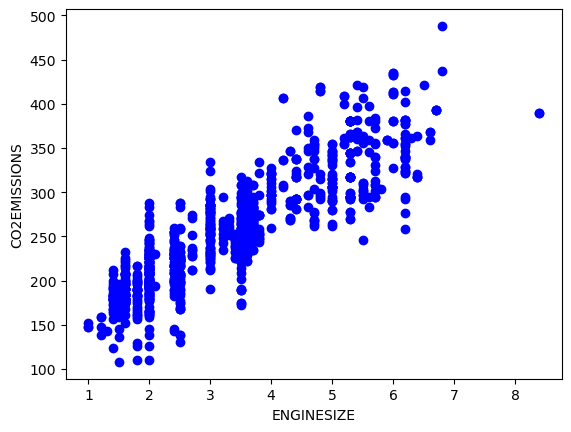

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

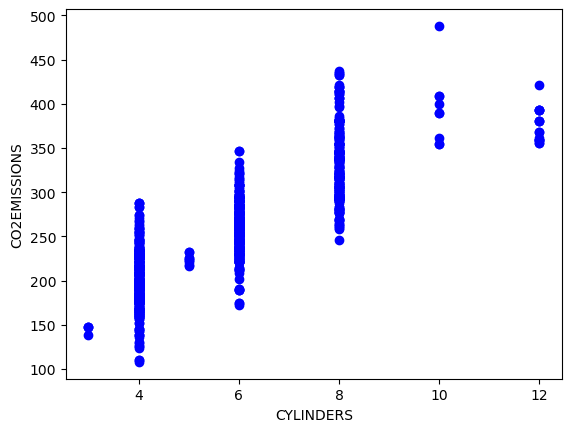

In [23]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()


#### Creating train and test dataset

In [8]:
msk = np.random.rand(len(df)) < 0.8

train = cdf[msk]

test = cdf[~msk]

train.head()




,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
2,1.5,4,5.9,136
3,3.5,6,11.1,255
5,3.5,6,10.0,230
6,3.5,6,10.1,232


In [9]:
test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,9.6,221
4,3.5,6,10.6,244
8,3.7,6,11.6,267
15,4.7,8,15.4,354
19,2.0,4,8.8,202



#### Train data distributions

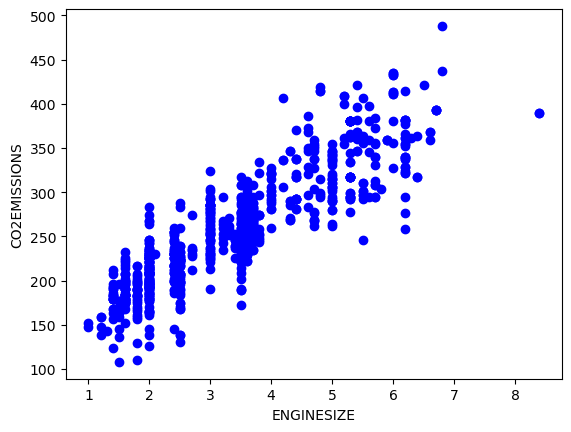

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()


#### Train data distributions vs test data

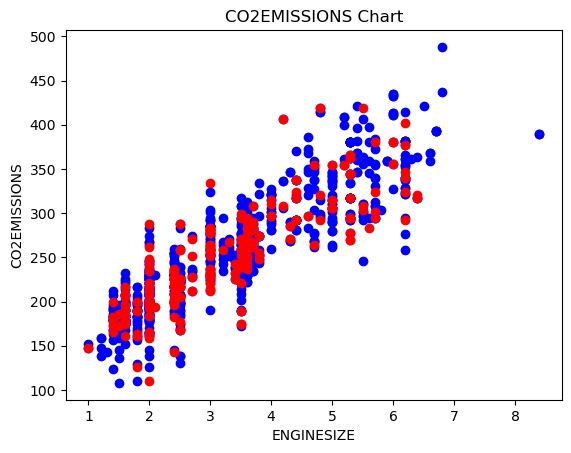

In [11]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue') 

ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'red') 

ax1.set_title('CO2EMISSIONS Chart')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()


### Modeling

#### Using linear regression from sklearn library to model data

In [12]:

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
                           
train_y = np.asanyarray(train[['CO2EMISSIONS']])
                           
regr.fit(train_x, train_y)
                           
print('Coeffitionts : ',  regr.coef_)
                           
print('Intercept : ',  regr.intercept_)



Coeffitionts :  [[39.63551924]]
Intercept :  [124.23328829]



#### Plot Outputs

#### We can plot the fit line over the data:

Text(0.5, 1.0, 'Co2 Emession')

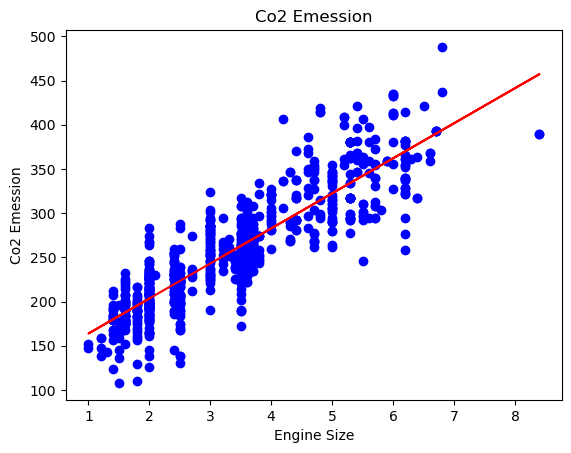

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')

plt.plot(train_x, (regr.coef_ * train_x) + regr.intercept_, '-r')

plt.xlabel('Engine Size')

plt.ylabel('Co2 Emession')

plt.title('Co2 Emession')

In [14]:
test_x = np.asanyarray(test[['ENGINESIZE']])
                           
test_y = np.asanyarray(test[['CO2EMISSIONS']])


predict_y = regr.predict(test_x)


print("mean absolute error : %.2f " % np.mean(np.absolute(test_y - predict_y)))

print("R2Score : %.2f" % r2_score(test_y, predict_y))


mean absolute error : 23.74 
R2Score : 0.72


### Conclusion

As we know, the coefficient of determination shows how many percent of the changes of the dependent variables in a regression model are explained by the independent variable. In other words, the detection coefficient or (R2Score) shows how much or what amount of changes in the dependent variable of the problem was influenced by the independent variable of the problem.

This means that the coefficient of determination of R2Score in this problem shows us that 72% of the cases of the amount of pollution produced by the car depends on the volume of its engine.

Also, the mean absolute error measures the absolute magnitude of the difference between the predicted and actual values.
MAE is a highly interpretable measure of how far the predictions are from the true values. In addition, it is robust to outliers because it does not magnify large errors by squaring them. In particular, where large errors are not significantly more important than small errors, MAE is a useful measure.